In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Q1

## 1.a

### Select at least 4 Points from 1st image by left-click on the image

In [2]:
def click_event(event, x, y, flags, params):  
    if event == cv2.EVENT_LBUTTONDOWN:
        
        i=0
        pts1.append((5*x,5*y))
        i = i + 1
        # displaying the coordinates on the image window 
        font = cv2.FONT_HERSHEY_SIMPLEX 
        cv2.putText(img, str(5*x) + ',' +
                    str(5*y), (x-50,y-10), font, 
                    0.5, (200, 0, 0), 1,cv2.LINE_AA,False) 
        cv2.imshow('image', img) 

In [3]:
pts1 = []
   
img = cv2.imread("image1.jpg")
img = cv2.resize(img,(img.shape[1]//5,img.shape[0]//5),0)

cv2.imshow('image', img) 
cv2.setMouseCallback('image', click_event) 

cv2.waitKey(0)
cv2.imwrite("out_images/image1_pts1.jpg",img)
cv2.destroyAllWindows()
print("pts1 :",pts1)

pts1 : [(810, 1220), (2740, 105), (3760, 1485), (1690, 2825)]


### Select at least 4 Pointsin the same order as from image1 from 2nd image by left-click on the image

In [4]:
def click_event(event, x, y, flags, params): 
    if event == cv2.EVENT_LBUTTONDOWN:
        
        i=0
        pts2.append((5*x,5*y))
        i = i + 1
        # displaying the coordinates on the image window 
        font = cv2.FONT_HERSHEY_SIMPLEX 
        cv2.putText(img, str(5*x) + ',' +
                    str(5*y), (x-50,y-10), font, 
                    0.5, (200, 0, 0), 1,cv2.LINE_AA,False) 
        cv2.imshow('image', img) 

In [5]:
pts2 = []
img = cv2.imread("image2.jpg")
img = cv2.resize(img,(img.shape[1]//5,img.shape[0]//5),0)
cv2.imshow('image', img) 
cv2.setMouseCallback('image', click_event) 
cv2.waitKey(0)
cv2.imwrite("image2_pts2.jpg",img)
cv2.destroyAllWindows()
print("pts2 :",pts2)

pts2 : [(1380, 580), (3490, 465), (3700, 2110), (1410, 2190)]


# WARNING 
Make sure the points in pts1 and pts2 are in same order.

## 1.b

In [6]:
def find_homography(pts_src,pts_dst):
    if len(pts_src)!=len(pts_dst):
        raise Exception("Equal no of points must be selected.")
    no_of_pts=len(pts_src)
    if no_of_pts<4:
        raise Exception("No of pts must be >= 4.")
    A=np.zeros((2*no_of_pts,9))
    for i in range(no_of_pts):
        A[2*i,::]=[0,0,0,-pts_src[i][0],-pts_src[i][1],-1,pts_dst[i][1]*pts_src[i][0],pts_dst[i][1]*pts_src[i][1],pts_dst[i][1]]
        A[2*i+1,::]=[pts_src[i][0],pts_src[i][1],1,0,0,0,-pts_dst[i][0]*pts_src[i][0],-pts_dst[i][0]*pts_src[i][1],-pts_dst[i][0]]
    u,sigma,vh=np.linalg.svd(A)
    H=vh[-1].reshape(3,3)/vh[-1,-1]
    return H

In [7]:
img1 = cv2.imread("image1.jpg")
img2 = cv2.imread("image2.jpg")


In [22]:
H=find_homography(pts1,pts2)
im_out = cv2.warpPerspective(img1, H, (img2.shape[1],img2.shape[0]))
im_out = cv2.resize(im_out,(im_out.shape[1]//5,im_out.shape[0]//5),0)
result1 = im_out
cv2.imshow("Warped Source Image", im_out)
cv2.waitKey(0)
cv2.imwrite("Warped_Source_Image.jpg",im_out)
cv2.destroyAllWindows()

## 1.c

In [24]:
h=cv2.findHomography(np.array(pts1),np.array(pts2))[0]
im_out1 = cv2.warpPerspective(img1, h, (img2.shape[1],img2.shape[0]))
im_out1 = cv2.resize(im_out1,(im_out1.shape[1]//5,im_out1.shape[0]//5),0)
result2 = im_out1
cv2.imshow("Warped Source Image_cv2", im_out1)
cv2.waitKey(0)
cv2.imwrite("Warped_Source_Image_cv2.jpg",im_out1)
cv2.destroyAllWindows()

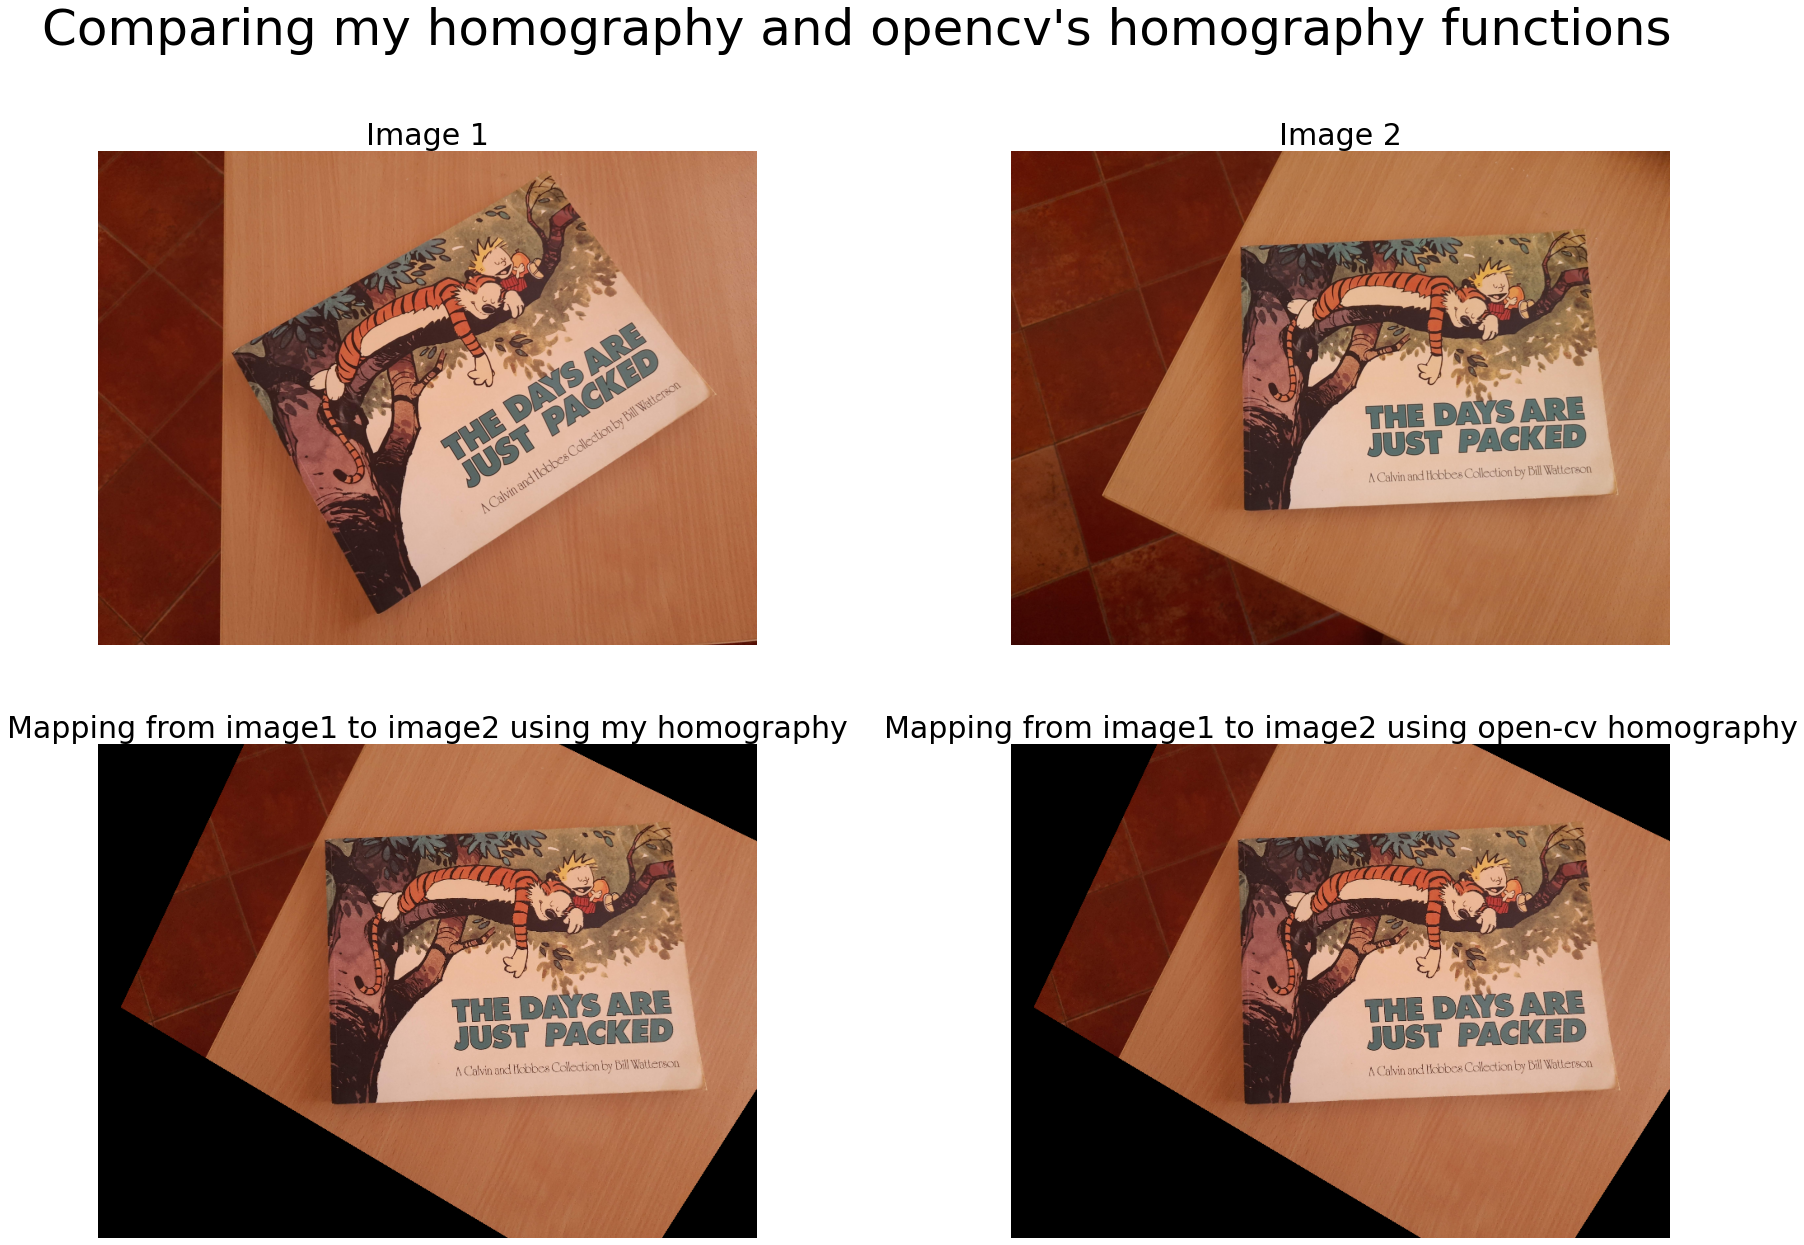

In [32]:
fig, axs = plt.subplots(2,2, figsize = (30,20))
axs[0,0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axs[0,0].set_title("Image 1", fontsize = 30)
axs[0,0].axis('off')
axs[0,1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axs[0,1].set_title("Image 2", fontsize = 30)
axs[0,1].axis('off')
axs[1,0].imshow(cv2.cvtColor(result1,cv2.COLOR_BGR2RGB))
axs[1,0].set_title("Mapping from image1 to image2 using my homography",fontsize = 30)
axs[1,0].axis('off')
axs[1,1].imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
axs[1,1].set_title("Mapping from image1 to image2 using open-cv homography",fontsize = 30)
axs[1,1].axis('off')
plt.suptitle("Comparing my homography and opencv's homography functions", fontsize = 50)
plt.show()


# Q2

In [27]:
img_hight = 3000
img_width = int(img_hight*30/23)
pts3=[[0,0],[img_width,0],[img_width,img_hight],[0,img_hight]]


im_src = cv2.imread("image1.jpg")
im_dst=np.zeros((img_hight,img_width,3))

H=find_homography(pts1,pts3)

im_out = cv2.warpPerspective(im_src, H, (im_dst.shape[1],im_dst.shape[0]))
im_out = cv2.resize(im_out,(im_out.shape[1]//5,im_out.shape[0]//5),0)
result3 = im_out
cv2.imshow("Warped Source Image", im_out.astype("uint8"))
cv2.imwrite("out_images/Image1_to_Image3.jpg",im_out.astype("uint8"))

cv2.waitKey(0)
cv2.destroyAllWindows()

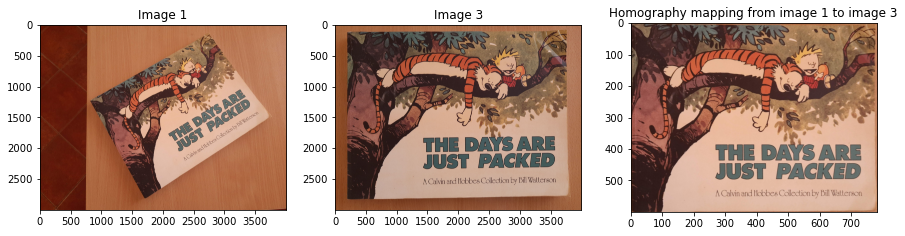

In [29]:
fig, axs = plt.subplots(1,3, figsize = (15, 6))
axs[0].imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
axs[0].set_title('Image 1')
axs[1].imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))
axs[1].set_title("Image 3")
axs[2].imshow(cv2.cvtColor(result3,cv2.COLOR_BGR2RGB))
axs[2].set_title("Homography mapping from image 1 to image 3")
plt.show()


# QS 3

### Example 1
Extracting the image from first image

In [13]:


pts = []

def click_event(event, x, y, flags, params): 
    if event == cv2.EVENT_LBUTTONDOWN:
        
        i=0
        pts.append((5*x,5*y))
        i = i + 1
        # displaying the coordinates on the image window 
        font = cv2.FONT_HERSHEY_SIMPLEX 
        cv2.putText(img, str(5*x) + ',' +
                    str(5*y), (x-50,y-10), font, 
                    0.5, (200, 0, 0), 1,cv2.LINE_AA,False) 
        cv2.imshow('image', img) 


img = cv2.imread("image3.jpg")
img = cv2.resize(img,(img.shape[1]//5,img.shape[0]//5),0)
# displaying the image 
cv2.imshow('image', img) 

cv2.setMouseCallback('image', click_event) 

cv2.waitKey(0)
cv2.destroyAllWindows()
print("pts :",pts)

pts : [(200, 105), (3750, 55), (3820, 2795), (195, 2830)]


In [14]:
img3 = cv2.imread("image3.jpg")

In [30]:
img_hight = 3000
img_width = img_hight*70//99
pts3=[[0,0],[img_width,0],[img_width,img_hight],[0,img_hight]]


im_src = img3
im_dst=np.zeros((img_hight,img_width,3))

H=find_homography(pts,pts3)

im_out = cv2.warpPerspective(im_src, H, (im_dst.shape[1],im_dst.shape[0]))
im_out = cv2.resize(im_out,(im_out.shape[1]//5,im_out.shape[0]//5),0)
im_out=im_out.astype("uint8")
result4 = im_out

cv2.imshow("Warped Source Image", im_out)
cv2.imwrite("out_images/img_extract_doc.jpg",im_out.astype("uint8"))

cv2.waitKey(0)
cv2.destroyAllWindows()

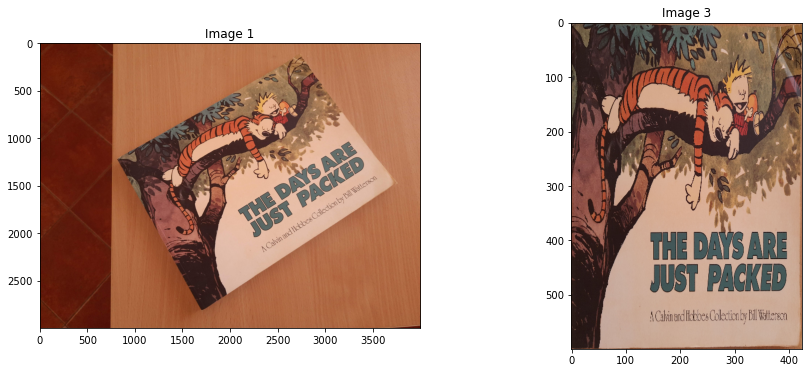

In [31]:
fig, axs = plt.subplots(1,2, figsize = (15, 6))
axs[0].imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
axs[0].set_title('Image 1')
axs[1].imshow(cv2.cvtColor(result4,cv2.COLOR_BGR2RGB))
axs[1].set_title("Image 3")
plt.show()
